In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import folium

### Data loading
The preprocessed data is loaded where the first column is used for index.

In [33]:
df = pd.read_csv(os.path.abspath('../data/Processed/Cities.csv'), index_col=0)

print(df.shape)
df.head()

(331, 80)


,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),...,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor,Latitude,Longitude
284,Baltimore(MD),285,7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,...,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187,39.290882,-76.610759
9,Melbourne,10,8,Auto Innovative,Australia,80.0,14.0,2,4.0,1.11,...,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910,-37.814218,144.963161
185,Niamey,186,1,Congested Emerging,Niger,NaN,9.0,2,60.0,1.02,...,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312,13.524834,2.109823
327,Hanoi,328,12,MetroBike Emerging,Vietnam,8.0,10.0,2,NaN,0.90,...,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113,21.029450,105.854444
66,Urumqi,67,12,MetroBike Emerging,China,21.7,54.7,NaN,NaN,1.16,...,0.447261,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617,43.419754,87.319461


### Missing values

Missing values are very important to be aware of when it comes to data science. Based on the number of missing values some columns or rows can (or should) fully be removed. In other cases the missing values can be imputed. They can also be left untouched but it is important to remember then as not all algorithmns handle missing values. Missing values can also be considered as its own category is some cases. Before taking any decision the 

In [39]:
print(f"{len(df.loc[:,df.isna().sum()>0].isna().sum())}/{df.shape[1]} columns has at least one missing value. The number of missing values per column (that has missing value(s)) is:")
df.loc[:,df.isna().sum()>0].isna().sum()

48/80 columns has at least one missing value. The number of missing values per column (that has missing value(s)) is:


Car Modeshare (%)                                  107
Public Transit Modeshare (%)                       104
Bicycle Modeshare (%)                              146
Walking Modeshare (%)                              132
Road Deaths Rate (per 1000)                          1
BRT Length (km)                                      1
BRT System Length Density (per km)                   2
BRT Stations per Hundred Thousand Persons           10
BRT Fleet per Hundred Thousand Persons              31
BRT Annual Ridership per Capita                      1
BRT Age (years)                                     15
Bikeshare Stations                                   3
Bikeshare Stations per Hundred Thousand Persons      1
Bikeshare Number of Bikes                           18
Bikeshare Bicycles per Hundred Thousand Persons     15
Bikeshare Age (years)                                3
Congestion (%)                                     166
Congestion AM Peak (%)                             166
Congestion

Firstly it is noticed that there is no missing values in the column with `CO2 Emissions per Capita (metric tonnes)` which is the value that is going to be predicted.

The number of missing values looks structured to some degree. There is e.g. many columns that has 108 or 14 missing values. To investigate this structure further a binary plot based on na values is generated, which is shown below:

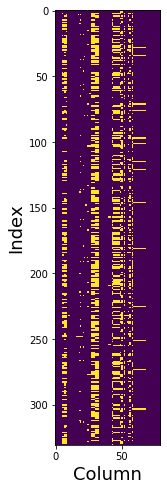

In [49]:
plt.figure(figsize = (20,8))
plt.imshow(df.isna())
plt.xlabel('Column', fontsize = 18)
plt.ylabel('Index', fontsize = 18)
plt.show()

From this it is clearly seen that there is structure to the missing values - as an example it is clear that it is the same 14 cities that has some missing values. This is definitely something to be aware of as these columns can not be used for prediction for these cities.

In [25]:
df.describe()

,cityID,clusterID,Car Modeshare (%),Public Transit Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,...,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor,Latitude,Longitude
count,331.000000,331.000000,224.000000,227.000000,199.000000,331.000000,330.000000,331.000000,331.000000,331.000000,...,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,166.000000,5.567976,47.688694,25.999218,18.270352,1.053988,14.707576,38.872356,0.037598,0.729446,...,0.173344,0.398780,0.416785,0.381920,0.171709,0.491645,0.492904,0.412400,26.234527,10.704624
std,95.695698,3.591750,28.588289,20.319709,15.845304,0.424823,8.718870,77.291871,0.068359,1.224042,...,0.148059,0.078614,0.266073,0.153003,0.159347,0.189305,0.227212,0.151951,21.783480,77.914851
min,1.000000,1.000000,0.000000,0.400000,0.000000,0.010000,0.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.814218,-157.855676
25%,83.500000,2.000000,22.475000,9.000000,3.200000,0.705000,7.500000,0.000000,0.000000,0.000000,...,0.078734,0.358541,0.213589,0.281133,0.055895,0.366844,0.309768,0.319600,14.657829,-71.989610
50%,166.000000,6.000000,43.000000,22.200000,16.000000,1.050000,13.950000,0.000000,0.000000,0.000000,...,0.139255,0.390862,0.341371,0.341087,0.120180,0.533182,0.473091,0.394053,32.080481,15.050276
75%,248.500000,8.000000,75.650000,39.650000,27.000000,1.315000,20.450000,42.550000,0.052714,1.137465,...,0.190673,0.423609,0.706330,0.450211,0.248221,0.640847,0.679550,0.474617,40.736174,74.084318
max,331.000000,12.000000,94.800000,82.500000,78.000000,2.120000,37.200000,588.000000,0.612982,9.797980,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.167410,174.763180


### Geographical placement

Let's get an overview of the location of the cities in the data set. Using the module `folium` a world map can be generated and all the cities can be added using the latitude and longitude that was added in the preprocessing. Notice that the name of a given city can be obtained by hovering the mouse over it.

In [34]:
def plot_points(map, latitude, longitude, tooltip = None):
    for lat, lon, tt in zip(latitude, longitude, tooltip):
        folium.CircleMarker(location=[lat, lon],
                                tooltip = tt,
                                radius=1,
                                weight=4).add_to(map)

m = folium.Map(prefer_canvas=True)
plot_points(m, df['Latitude'], df['Longitude'], df['City'])
m

The cities seems to be spread fairly wide around the world with a lack of cities in the more Northern of Southern part of the world. The *densest* clusters of cities in the dataset are found in the Easter part of the US, Central Europa and Eastern part of Asia.